## Tutorial 2: Network parameters
* http://doc.netpyne.org/tutorial.html#tutorial-2-network-parameters

### NetPyNE parameters
* cellParams - cell types and their associated parameters (e.g. cell geometry)
* popParams - populations in the network and their parameters
* synMechParams - synaptic mechanisms and their parameters
* connParams - network connectivity rules and their associated parameters.
* subConnParams - network subcellular connectivity rules and their associated parameters.
* stimSourceParams - stimulation sources parameters.
* stimTargetParams - mapping between stimulation sources and target cells.
* rxdParams - reaction-diffusion (RxD) components and their parameters.

### Constructing a network
1. creates a Network object and adds inside a set of Population and Cell objects based on popParams
1. sets the cell properties based on cellParams
1. creates a set of connections based on connParams and subConnParams (checking which presynpatic and postsynaptic cells match the conn rule conditions), and using the synaptic parameters in synMechParams.
1. add stimulation to the cells based on stimSourceParams and stimTargetParams.
* image schema:
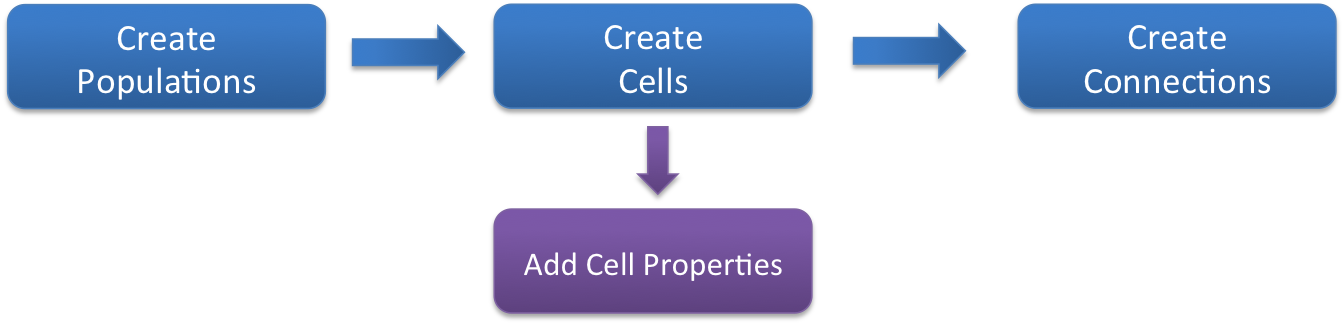

In [1]:
# load library
from netpyne import specs, sim

# Network parameters
netParams = (
    specs.NetParams()
)  # object of class NetParams to store the network parameters

--No graphics will be displayed.


In [2]:
# For cell parameters,
# "secs" is a list of dictionaries, each containing the parameters of a section.
# e.g.: gemoetry, mechanisms, etc.
PYRcell = {"secs": {}}
PYRcell["secs"]["soma"] = {"geom": {}, "mechs": {}}
PYRcell["secs"]["soma"]["geom"] = {
    "diam": 18.8,
    "L": 18.8,
    "Ra": 123.0,
}  # soma geometry
PYRcell["secs"]["soma"]["mechs"]["hh"] = {
    "gnabar": 0.12,
    "gkbar": 0.036,
    "gl": 0.003,
    "el": -70,
}  # soma hh mechanism
netParams.cellParams["PYR"] = PYRcell

# one line version
# netParams.cellParams['PYR'] = {
#    'secs': {'soma':
#            {'geom': {'diam': 18.8, 'L': 18.8, 'Ra': 123.0},
#            'mechs': {'hh': {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}}}}})

In [3]:
## Population parameters
netParams.popParams["S"] = {"cellType": "PYR", "numCells": 20}
netParams.popParams["M"] = {"cellType": "PYR", "numCells": 20}

In [4]:
print(netParams.cellParams)

{PYR: {'secs': {'soma': {'geom': {'diam': 18.8, 'L': 18.8, 'Ra': 123.0}, 'mechs': {'hh': {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}}}}}}


In [5]:
print(netParams.popParams)

{S: {'cellType': 'PYR', 'numCells': 20}, M: {'cellType': 'PYR', 'numCells': 20}}


In [6]:
print(netParams.popParams["S"])

{'cellType': 'PYR', 'numCells': 20}


In [7]:
## Synaptic mechanism parameters
netParams.synMechParams["exc"] = {
    "mod": "Exp2Syn",
    "tau1": 0.1,  # rise time
    "tau2": 5.0,  # decay time
    "e": 0,  # reversal potential
}  # excitatory synaptic mechanism

In [8]:
## Stimulation parameters
netParams.stimSourceParams["bkg"] = {
    "type": "NetStim",  # NEURON's artificial spike generator
    "rate": 10,  # hertz
    "noise": 0.5,  # noise level
}
netParams.stimTargetParams["bkg->PYR"] = {
    "source": "bkg",  # source of spikes
    "conds": {"cellType": "PYR"},  # conditions for target cells
    "weight": 0.01,  # synaptic weight
    "delay": 5,  # ms
    "synMech": "exc",  # synaptic mechanism
}

In [9]:
## Cell connectivity rules
netParams.connParams["S->M"] = {
    "preConds": {"pop": "S"},
    "postConds": {"pop": "M"},
    "probability": 0.5,
    "weight": 0.01,
    "delay": 5,
    "synMech": "exc",
}

In [10]:
## Simulation options
simConfig = (
    specs.SimConfig()
)  # object of class SimConfig to store simulation configuration

simConfig.duration = 1 * 1e3  # Duration of the simulation, in ms
simConfig.dt = 0.025  # Internal integration timestep to use
simConfig.verbose = False  # Show detailed messages
simConfig.recordTraces = {
    "V_soma": {"sec": "soma", "loc": 0.5, "var": "v"}
}  # Dict with traces to record
simConfig.recordStep = 0.1  # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = "./results/Tutorial02-3/tut2"  # Set file output name
simConfig.savePickle = False  # Save params, network and sim output to pickle file

simConfig.analysis["plotRaster"] = {"saveFig": True}  # Plot a raster
simConfig.analysis["plotTraces"] = {
    "include": [1, 2, 39],
    "saveFig": True,
}  # Plot recorded traces for this list of cells
simConfig.analysis["plot2Dnet"] = {
    "saveFig": True
}  # plot 2D visualization of cell positions and connections

### For more details
* For simulation parameters, see: http://doc.netpyne.org/user_documentation.html#sim-config
* For network parameters, see: http://doc.netpyne.org/user_documentation.html#network-parameters

In [11]:
## Create network and run simulation
sim.createSimulateAnalyze(netParams, simConfig)


Start time:  2024-10-29 09:38:17.962642




Creating network of 2 cell populations on 1 hosts...: 100%|##########|


  Number of cells on node 0: 40 
  Done; cell creation time = 0.02 s.
Making connections...


  S->M: 100%|##########| Creating synaptic connections for 20/20 postsynaptic cells on node 0 (probabilistic connectivity)

  Number of connections on node 0: 203 
  Done; cell connection time = 0.03 s.
Adding stims...
  Number of stims on node 0: 40 
  Done; cell stims creation time = 0.00 s.
Recording 3 traces of 1 types on node 0

Running simulation using NEURON for 1000.0 ms...
  Done; run time = 0.70 s; real-time ratio: 1.43.

Gathering data...
  Done; gather time = 0.01 s.

Analyzing...
  Cells: 40
  Connections: 243 (6.08 per cell)
  Spikes: 916 (22.90 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 0.70 s
Preparing spike data...


Plotting raster...
Plotting recorded cell traces ... cell
Plotting 2D representation of network cell locations and connections...
  Done; plotting time = 0.89 s

Total time = 1.66 s


## Tutorial 3: Adding a compartment (dendrite) to cells
* Extend the previous tutorial by adding a dendrite compartment to the cells
* note that 'dend' section includes the 'topol' dict for connecting the dendrite to the soma

In [17]:
## Cell types
PYRcell = {"secs": {}}

PYRcell["secs"]["soma"] = {"geom": {}, "mechs": {}}
PYRcell["secs"]["soma"]["geom"] = {"diam": 18.8, "L": 18.8, "Ra": 123.0}
PYRcell["secs"]["soma"]["mechs"]["hh"] = {
    "gnabar": 0.12,
    "gkbar": 0.036,
    "gl": 0.003,
    "el": -70,
}

PYRcell["secs"]["dend"] = {"geom": {}, "topol": {}, "mechs": {}}
PYRcell["secs"]["dend"]["geom"] = {"diam": 5.0, "L": 150.0, "Ra": 150.0, "cm": 1}
PYRcell["secs"]["dend"]["topol"] = {"parentSec": "soma", "parentX": 1.0, "childX": 0}
PYRcell["secs"]["dend"]["mechs"]["pas"] = {"g": 0.0000357, "e": -70}

netParams.cellParams["PYR"] = PYRcell

In [18]:
## Population parameters
netParams.popParams["S"] = {"cellType": "PYR", "numCells": 20}
netParams.popParams["M"] = {"cellType": "PYR", "numCells": 20}


## Synaptic mechanism parameters
netParams.synMechParams["exc"] = {
    "mod": "Exp2Syn",
    "tau1": 1.0,
    "tau2": 5.0,
    "e": 0,
}  # excitatory synaptic mechanism


# Stimulation parameters
netParams.stimSourceParams["bkg"] = {"type": "NetStim", "rate": 10, "noise": 0.5}
netParams.stimTargetParams["bkg->PYR"] = {
    "source": "bkg",
    "conds": {"cellType": "PYR"},
    "weight": 0.01,
    "delay": 5,
    "synMech": "exc",
}

In [13]:
print(netParams.cellParams)

{PYR: {'secs': {'soma': {'geom': {'diam': 18.8, 'L': 18.8, 'Ra': 123.0}, 'mechs': {'hh': {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}}}, 'dend': {'geom': {'diam': 5.0, 'L': 150.0, 'Ra': 150.0, 'cm': 1}, 'topol': {'parentSec': 'soma', 'parentX': 1.0, 'childX': 0}, 'mechs': {'pas': {'g': 3.57e-05, 'e': -70}}}}}}


In [19]:
# at this time, we connect dendrite of M from S
netParams.connParams["S->M"] = {  #  S -> M
    "preConds": {"pop": "S"},  # presynaptic conditions
    "postConds": {"pop": "M"},  # postsynaptic conditions
    "probability": 0.5,  # probability of connection
    "weight": 0.01,  # synaptic weight
    "delay": 5,  # transmission delay (ms)
    "sec": "dend",  # section to connect to
    "loc": 1.0,  # location of synapse
    "synMech": "exc",
}  # target synaptic mechanism

In [20]:
simConfig.filename = "./results/Tutorial02-3/tut3"  # Set file output name

In [21]:
sim.createSimulateAnalyze(netParams, simConfig)


Start time:  2024-10-29 09:43:41.598311




Creating network of 2 cell populations on 1 hosts...: 100%|##########|


  Number of cells on node 0: 40 
  Done; cell creation time = 0.02 s.
Making connections...


  S->M: 100%|##########| Creating synaptic connections for 20/20 postsynaptic cells on node 0 (probabilistic connectivity)

  Number of connections on node 0: 203 
  Done; cell connection time = 0.03 s.
Adding stims...
  Number of stims on node 0: 40 
  Done; cell stims creation time = 0.00 s.
Recording 3 traces of 1 types on node 0

Running simulation using NEURON for 1000.0 ms...
  Done; run time = 0.63 s; real-time ratio: 1.58.

Gathering data...
  Done; gather time = 0.01 s.

Analyzing...
  Cells: 40
  Connections: 243 (6.08 per cell)
  Spikes: 560 (14.00 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 0.63 s
Preparing spike data...
Plotting raster...


Plotting recorded cell traces ... cell
Plotting 2D representation of network cell locations and connections...
  Done; plotting time = 0.85 s

Total time = 1.56 s
